In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
%matplotlib inline

In [6]:
train=pd.read_csv("train.csv",header=None)
trainlabels=pd.read_csv("trainLabels.csv",header=None)

In [8]:
train.head(5)

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,0.299403,-1.226624,1.498425,-1.176150,5.289853,0.208297,2.404498,1.594506,-0.051608,0.663234,...,-0.850465,-0.622990,-1.833057,0.293024,3.552681,0.717611,3.305972,-2.715559,-2.682409,0.101050
1,-1.174176,0.332157,0.949919,-1.285328,2.199061,-0.151268,-0.427039,2.619246,-0.765884,-0.093780,...,-0.819750,0.012037,2.038836,0.468579,-0.517657,0.422326,0.803699,1.213219,1.382932,-1.817761
2,1.192222,-0.414371,0.067054,-2.233568,3.658881,0.089007,0.203439,-4.219054,-1.184919,-1.240310,...,-0.604501,0.750054,-3.360521,0.856988,-2.751451,-1.582735,1.672246,0.656438,-0.932473,2.987436
3,1.573270,-0.580318,-0.866332,-0.603812,3.125716,0.870321,-0.161992,4.499666,1.038741,-1.092716,...,1.022959,1.275598,-3.480110,-1.065252,2.153133,1.563539,2.767117,0.215748,0.619645,1.883397
4,-0.613071,-0.644204,1.112558,-0.032397,3.490142,-0.011935,1.443521,-4.290282,-1.761308,0.807652,...,0.513906,-1.803473,0.518579,-0.205029,-4.744566,-1.520015,1.830651,0.870772,-1.894609,0.408332


In [10]:
x_train,x_test,y_train,y_test=train_test_split(train,trainlabels,
                                               test_size=0.2,random_state=88)

In [18]:
x_train.shape

(800, 40)

In [16]:
x_test.shape

(200, 40)

In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
regr=LinearRegression()

In [14]:
regr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [19]:
y_predict=regr.predict(x_test)

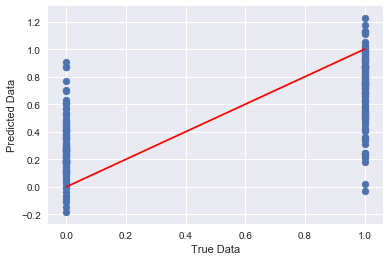

In [23]:
plt.scatter(y_test,y_predict)
plt.plot([0,1],[0,1],'r')#若預測正確，應該會呈現在對角線上
plt.xlabel('True Data')
plt.ylabel('Predicted Data')

In [40]:
from sklearn.tree import DecisionTreeRegressor

In [41]:
tree=DecisionTreeRegressor()

In [42]:
tree.fit(x_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

In [43]:
y_predict=tree.predict(x_test)

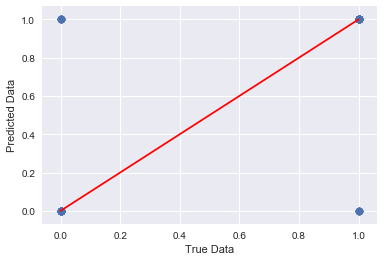

In [44]:
plt.scatter(y_test,y_predict)
plt.plot([0,1],[0,1],'r')#若預測正確，應該會呈現在對角線上
plt.xlabel('True Data')
plt.ylabel('Predicted Data')

In [50]:
#拿題目給的test進行預測
test=pd.read_csv('test.csv',header=None)
test.head(3)

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,2.808909,-0.242894,-0.546421,0.255162,1.749736,-0.030458,-1.322071,3.578071,-0.667578,-0.884257,...,-0.261688,-0.224375,-1.675606,-0.479584,-0.244388,-0.672355,0.517860,0.010665,-0.419214,2.818387
1,-0.374101,0.537669,0.081063,0.756773,0.915231,2.557282,3.703187,1.673835,-0.764122,-1.228040,...,-0.969463,0.574154,-2.200519,-1.612240,0.179031,-2.924596,0.643610,-1.470939,-0.067408,-0.976265
2,-0.088370,0.154743,0.380716,-1.176126,1.699867,-0.258627,-1.384999,1.093584,1.596633,0.230631,...,-0.769885,-0.005143,1.467490,0.483803,-3.542981,0.814561,-1.652948,1.265866,-1.749248,1.773784


In [147]:
predict=tree.predict(test)

In [148]:
predict=predict.astype(int)

In [171]:
submission=pd.DataFrame()

In [172]:
submission['Solution']=predict

In [173]:
submission.index = np.arange(1, len(submission)+1)

In [174]:
submission.to_csv('submission.csv',index_label ='Id')

In [175]:
submission

,Solution
1,1
2,0
3,0
4,0
5,1
6,1
7,0
8,1
9,0
10,0


In [33]:
from sklearn.ensemble import RandomForestRegressor

In [34]:
forest=RandomForestRegressor()

In [35]:
forest.fit(x_train,y_train)

C:\Users\d33459\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [37]:
y_predict=forest.predict(x_test)

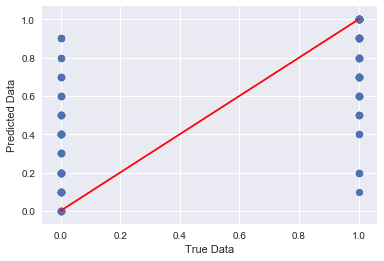

In [39]:
plt.scatter(y_test,y_predict)
plt.plot([0,1],[0,1],'r')#若預測正確，應該會呈現在對角線上
plt.xlabel('True Data')
plt.ylabel('Predicted Data')